Python for Finance --- Exam template
----
***


## GENERAL INSTRUCTIONS


- For each question, you are asked to create a function with specific inputs and outputs.

- You should copy / paste all your functions, one after the others, in a single file named `CID.py`

- You may only use the following libraries (and none other)

- Grading details:
    + Clarity of the code (name of temporary variables, comments)
    + Efficiency of the code (speed)

---

In [1]:
import platform
print(platform.python_version())

3.8.10


In [2]:
import numpy as np
import pandas as pd
import time
from scipy.stats import norm
import matplotlib.pylab as plt
from scipy import stats

# Problem 1: Vectorising the Central Limit Theorem

Consider an iid sequence of random variables $(X_i)_{i=1,\ldots, n}$ with finite mean $\mu$ and finite variance $\sigma^2>0$, and consider
$$
S_n := \frac{1}{n}\sum_{i=1}^{n}X_i.
$$
The Central Limit Theorem asserts that the sequence $(S_n-\mu)\sqrt{n}/\sigma$ converges in distribution to a centered Gaussian random variable with unit variance. The goal of the exercise is to verify this.

We shall assume that, for any $i=1,\ldots, n$, $X_i$ is uniformly distributed over $[0,1]$.

# Question 1:

Write a function clt(n, m, a, b) with the following specifications:

Input:
- n: integer, representing the upper bound in the sum above
- m: integer, representing the number of samples
- a, b: interval over which the Uniform distribution is sampled

Output:
- a sample $(S_n^j)_{j=1,\ldots, m}$, represented as a np.array() of dimension m.

You may use `stats.uniform.rvs(size=(n,m))` to generate Uniform [0,1] samples of size (n,m).

You may also use the following script to visualise your results:

In [3]:
def visualise_result(ss:np.array):
    '''
    ss = np.array of samples of S_n
    '''
    X = stats.norm(loc=np.mean(ss), scale=np.std(ss))
    plt.hist(x=ss, bins='auto', alpha=0.7, rwidth=0.85, density=True);
    xx = np.linspace(np.min(ss), np.max(ss), 100),
    plt.plot(xx[0], X.pdf(xx)[0], linestyle='solid', c='red', label='True Gaussian pdf')
    plt.show()

## Template SOLUTION

In [4]:
def clt(n:int, m:int, a:float, b:float)->np.array:
    '''
    #Inputs:
    n: integer, number of terms in the sum
    m: integer, number of samples
    [a, b]: support of the Uniform distribution
    #Output: np.array with lenght n with samples for the arithmetic average
    '''
    assert(len(output)==m)
    return output

## Full SOLUTION

In [5]:
def clt(n:int, m:int, a:float, b:float)->np.array:
    '''
    #Inputs:
    n: integer, number of terms in the sum
    m: integer, number of samples
    [a, b]: support of the Uniform distribution
    #Output:
    #Output: np.array with lenght n with samples for the arithmetic average
    '''
    xx = a + (b-a)*stats.uniform.rvs(size=(n,m))
    
    ## Theoretical mean and variance of the Uniform
    mu, sigma = (a+b)/2., np.sqrt((b-a)**2/12.)
    
    ss = np.sum(xx, axis=0) / n
    ss = ss.reshape(len(ss))
    output=(ss - mu)*np.sqrt(n) / sigma
    assert(len(output)==m)
    return output

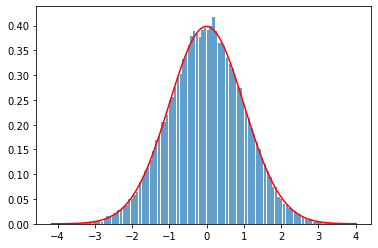

In [6]:
n, m, a, b = 5000, 50000, 2, 5
ss = clt(n, m, a, b)
visualise_result(ss)

## Analysis of the results

In [7]:
def problem_analysis(n:int, m:int, a:float=2, b:float=5)->list:
    ## Compute the p-value and the computation time
    t0 = time.time()
    ss = clt(n, m, a, b)
    dt = time.time() - t0
    return stats.normaltest(ss)[1], dt

In [8]:
n, m, a, b = 10000, 50000, 2, 5
p, dt = problem_analysis(n,m,0,1)
print(p, dt)

0.17241523340422948 10.9944908618927
